In [2]:
# Open the database
import pandas as pd

vstar = pd.read_csv('vsx.csv')


In [3]:
# Number of rows
len(vstar)

451272

In [4]:
# Show the first 10 rows
vstar.head(10)

iod                  name  code   type  mag_min  mag_max      period  \
0  270915  VSX J000000.6+620044     0     SR   12.300   12.550   68.000000   
1     195                GM And     0   RRAB   12.430   13.300    0.706758   
2  287959  CSS_J000004.0+182425     0   RRAB   15.171    0.970    0.485160   
3  275753             Mis V1378     0     SR   11.400   12.700         NaN   
4  170899            UNSW-V 312     0     EA   13.630    0.066    1.057620   
5   64625             V0467 And     0     EW   15.210   15.610    0.353539   
6   25131                 Z Peg     0      M    7.300   13.600  320.000000   
7  251805             V1023 Cas     0   RRAB   18.130   18.750    0.643700   
8   25281                EP Peg     0     SR   10.700   11.400  340.000000   
9   25257                DM Peg     0  EA/D:   10.800   11.600    2.588991   

        ra       dec  
0  0.00271  62.01222  
1  0.01521  35.36286  
2  0.01669  18.40698  
3  0.01717  57.10467  
4  0.02500 -59.74675  
5  0.02721  35.36692  
6  0.02733  25.88647  
7  0.02771  56.65331  
8  0.02875  20.23736  
9  0.03037  18.73808

In [5]:
# Show the first 10 M-type variables (Red Giants)
vstar[vstar.type == 'M'].head(10)

iod                  name  code type  mag_min  mag_max  period  \
6     25131                 Z Peg     0    M    7.300   13.600  320.00   
67    20362                ST Oct     0    M   12.600   16.900  349.00   
74    26406                RR Psc     0    M   12.100   16.000  270.60   
108  131777             V1245 Cas     0    M   11.100   14.300  318.00   
193    9076                 W Cet     0    M    7.100   15.000  352.00   
226  131363             Mis V0727     0    M   10.100   13.200  346.00   
267    6571                IW Cas     0    M   11.400   14.700  396.38   
306    6338                 Y Cas     0    M    8.700   15.300  413.48   
390   64656  NSVS J0004164+704130     0    M   10.309    1.913  448.00   
396      22                SV And     0    M    7.700   14.700  313.00   

          ra       dec  
6    0.02733  25.88647  
67   0.22112 -87.90756  
74   0.25567   6.45767  
108  0.33979  51.20386  
193  0.53079 -14.67586  
226  0.58346  57.03719  
267  0.68433  48.71422  
306  0.83937  55.68111  
390  1.06821  70.69162  
396  1.08363  40.10994

In [6]:
# Stats
vstar.describe()

iod           code        mag_min        mag_max  \
count  451272.000000  451272.000000  449589.000000  419379.000000   
mean   292180.550369       0.052797      14.330296       3.371067   
std    161876.329904       0.249706       2.726411       5.949351   
min         1.000000       0.000000      -6.000000       0.000000   
25%    146803.750000       0.000000      12.790000       0.171000   
50%    315154.500000       0.000000      14.600000       0.440000   
75%    429332.250000       0.000000      16.200000       1.210000   
max    545396.000000       2.000000      25.200000      28.000000   

              period             ra            dec  
count  336745.000000  451272.000000  451272.000000  
mean       52.596930     220.585712     -11.273924  
std       170.577608      84.203769      36.264138  
min         0.000000       0.002710     -89.868530  
25%         0.439660     160.510315     -34.904418  
50%         1.365730     261.623955     -23.392200  
75%        48.348106     280.265410      19.476737  
max     35320.000000     359.993000      89.392390

In [7]:
# Drop rows with missing values
vstar = vstar.dropna()

In [8]:
# Value counts
vstar.code.value_counts()

# Count by type
vstar.type.value_counts().head(10)



RRAB    49951
EW      49120
ROT     40431
SR      37417
MISC    26430
EA      19335
M       16956
RRC     15447
EC       9522
RS       4921
Name: type, dtype: int64

In [9]:
# Add the amplitude of the stars
vstar['amplitude'] = vstar.mag_max - vstar.mag_min

# Discard the negative amplitudes (The data is formatted differently)
vstar = vstar[vstar.amplitude > 0]

In [10]:
vstar.count()

iod          48804
name         48804
code         48804
type         48804
mag_min      48804
mag_max      48804
period       48804
ra           48804
dec          48804
amplitude    48804
dtype: int64

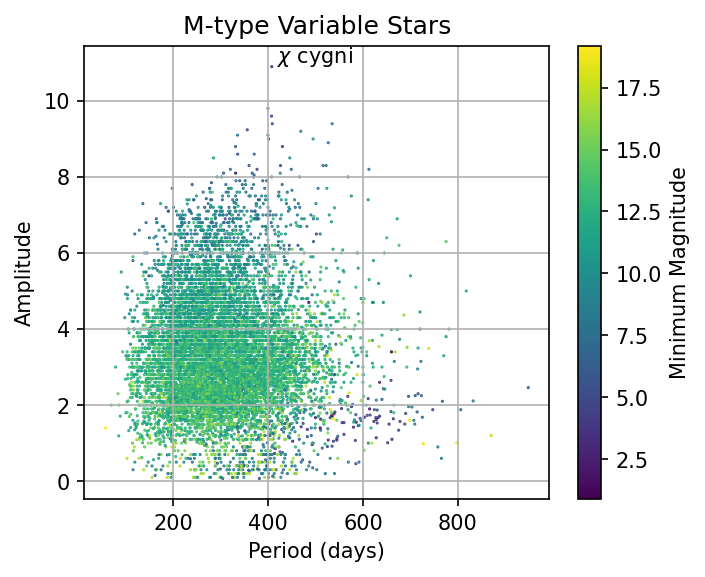

In [11]:

# Period vs. Amplitude in MIRA-type variable stars

M = vstar[vstar.type == 'M']

import matplotlib.pyplot as plt

plt.figure(figsize=(5,4), dpi=150)
plt.grid()
plt.scatter(M.period, M.amplitude, marker='.', s=1, c=M.mag_min)
plt.xlabel('Period (days)')
plt.ylabel('Amplitude')
plt.title('M-type Variable Stars')
plt.text(420,11, '$\chi$ cygni')
plt.colorbar(label='Minimum Magnitude')

In [12]:
M[M.amplitude>10]

iod     name  code type  mag_min  mag_max  period         ra  \
402961  13285  khi Cyg     0    M      3.3     14.2  408.05  297.64133   

             dec  amplitude  
402961  32.91406       10.9

In [13]:
M[M.period>800]

iod                       name  code type  mag_min  mag_max  \
80986    56188                  V0688 Pup     0    M     8.06    10.17   
144938  272331                     FK Cru     0    M     7.35     9.23   
178829  272323                     EX Cir     0    M     6.17     8.63   
286421  135005  OGLEII DIA BUL-SC30 V3654     0    M    17.70    18.90   
313880  134506  OGLEII DIA BUL-SC17 V0983     0    M    12.00    17.00   

        period         ra       dec  amplitude  
80986    832.0  122.33442 -36.40744       2.11  
144938   806.0  191.27846 -62.56067       1.88  
178829   948.0  228.06075 -57.22436       2.46  
286421   870.0  270.23608 -28.77456       1.20  
313880   817.4  272.86487 -26.49233       5.00

In [16]:
# variable stars YOU could monitor (sometimes) with your naked eye!

vstar[(vstar.dec > -10) & (vstar.mag_min < 4) & (vstar.amplitude>3) & (vstar.type == 'M')].sort_values(['mag_min'])

iod     name  code type  mag_min  mag_max  period         ra  \
6106    26442   WX Psc     0    M      0.9      4.3  660.00   16.60825   
448104  25366   IZ Peg     0    M      1.7      6.4  486.00  352.07129   
12453    9237  omi Cet     0    M      2.0     10.1  331.96   34.83662   
402961  13285  khi Cyg     0    M      3.3     14.2  408.05  297.64133   

             dec  amplitude  
6106    12.59800        3.4  
448104  10.91039        4.7  
12453   -2.97764        8.1  
402961  32.91406       10.9